Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 54s 1ms/sample - loss: 1.5149 - accuracy: 0.4482 - val_loss: 1.2667 - val_accuracy: 0.5431
Epoch 2/10
50000/50000 [==============================] - 48s 950us/sample - loss: 1.1500 - accuracy: 0.5952 - val_loss: 1.0674 - val_accuracy: 0.6278
Epoch 3/10
50000/50000 [==============================] - 53s 1ms/sample - loss: 1.0017 - accuracy: 0.6481 - val_loss: 1.0184 - val_accuracy: 0.6426
Epoch 4/10
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.9014 - accuracy: 0.6846 - val_loss: 0.9259 - val_accuracy: 0.6790
Epoch 5/10
50000/50000 [==============================] - 58s 1ms/sample - loss: 0.8267 - accuracy: 0.7082 - val_loss: 0.9066 - val_accuracy: 0.6823
Epoch 6/10
50000/50000 [==============================] - 54s 1ms/sample - loss: 0.7614 - accuracy: 0.7318 - val_loss: 0.8538 - val_accuracy: 0.7104
Epoch 7/10
50000/50000 [==============================

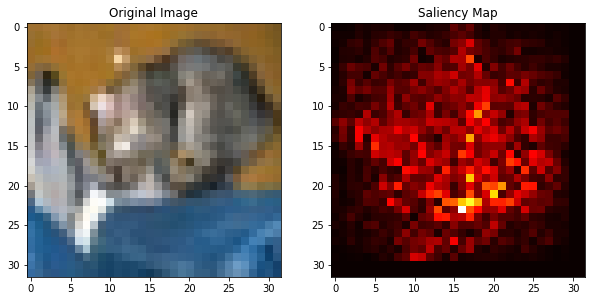

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 加载并预处理CIFAR-10数据集
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# 构建简单的CNN模型
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# 选择测试集中的一张图像进行可视化
image_index = 0
image = x_test[image_index:image_index+1]
label = y_test[image_index]

# 转换为张量
image = tf.convert_to_tensor(image)
label = tf.convert_to_tensor(label)

# 获取模型对该图像的预测
with tf.GradientTape() as tape:
    tape.watch(image)
    predictions = model(image)
    loss = tf.keras.losses.sparse_categorical_crossentropy(label, predictions)

# 计算梯度
gradient = tape.gradient(loss, image)
saliency_map = tf.reduce_max(tf.abs(gradient), axis=-1)[0]

# 可视化原图像和Saliency Map
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image[0])

plt.subplot(1, 2, 2)
plt.title("Saliency Map")
plt.imshow(saliency_map, cmap='hot')

plt.show()
